# **Lab 1: Linear Regression**

The lab report will be due by **Feburary 14th, 2023**. 

Please submit the ipynb file of your lab via the link in Brightspace.

##**Problem 1**
In this problem, we will explore the basic linear regression: $y_n=w_0 +w_1x_n$, where $n=1,\dots, N$ is the index of the data sample. Your task is to determine the appropriate values of $w_0$ and $w_1$ for the given data samples in Lab1_1.csv.

Requirments: 
*   You are required to use gradient descent algorithm to complete this problem.
*   You need to include the following four components in your lab report: (1) the codes, (2) the obtained appropriate value of $w_0$ and $w_1$, (3) the obtained training error, and (4) the obtained testing error. 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Some useful Python libaries (feel free to import other libaries)
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, optimizers
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split 

# Obtain your data samples
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Lab1_CNIT483/Lab1_1.csv') # you may need to change the path
x_data = data['x'].values
y_data = data['y'].values

# Generate training data (70% of the given data samples) and the testing data (30% of the given data samples). You can change to other percentage value as long as test_size <=0.3.
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3) 



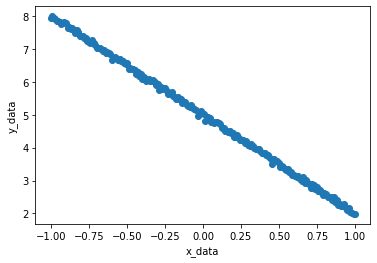

In [ ]:
# creating scatter plot
plt.scatter(x_data, y_data) 
plt.xlabel("x_data")
plt.ylabel("y_data") 
plt.show()

In [ ]:
# initializing Gradient-descent model
# Ref: 1) tf.keras.layers.Normalization: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Normalization; and 2) tf.keras.layers.Dense: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense
model = models.Sequential()
model.add(layers.Normalization(input_shape=(1,), axis=None))
model.add(layers.Dense(1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [ ]:
# Utilize gradient-descent algorithm to create the learning model
adam = optimizers.Adam(learning_rate=0.5)
model.compile(optimizer='adam',
              loss='mean_absolute_error',
              metrics=['mean_absolute_error'])

history = model.fit(x_train, y_train, epochs=2000, 
                    validation_data=(x_test, y_test))

Epoch 1/2000
5/5 [==============================] - 0s 31ms/step - loss: 4.9822 - mean_absolute_error: 4.9822 - val_loss: 5.0346 - val_mean_absolute_error: 5.0346
Epoch 2/2000
5/5 [==============================] - 0s 11ms/step - loss: 4.9772 - mean_absolute_error: 4.9772 - val_loss: 5.0295 - val_mean_absolute_error: 5.0295
Epoch 3/2000
5/5 [==============================] - 0s 7ms/step - loss: 4.9722 - mean_absolute_error: 4.9722 - val_loss: 5.0245 - val_mean_absolute_error: 5.0245
Epoch 4/2000
5/5 [==============================] - 0s 8ms/step - loss: 4.9671 - mean_absolute_error: 4.9671 - val_loss: 5.0195 - val_mean_absolute_error: 5.0195
Epoch 5/2000
5/5 [==============================] - 0s 7ms/step - loss: 4.9622 - mean_absolute_error: 4.9622 - val_loss: 5.0145 - val_mean_absolute_error: 5.0145
Epoch 6/2000
5/5 [==============================] - 0s 11ms/step - loss: 4.9572 - mean_absolute_error: 4.9572 - val_loss: 5.0095 - val_mean_absolute_error: 5.0095
Epoch 7/2000
5/5 [=======

In [ ]:
# Output weight w_1 and bias w_0
W = model.layers[1].get_weights()
print(W)

[array([[-3.008329]], dtype=float32), array([5.003859], dtype=float32)]


2/2 - 0s - loss: 0.0347 - mean_absolute_error: 0.0347 - 19ms/epoch - 10ms/step
0.03468351811170578


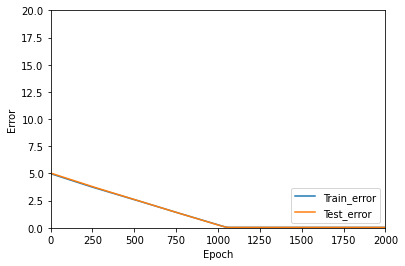

In [ ]:
# Data visualization and performance evaluation
plt.plot(history.history['mean_absolute_error'], label='Train_error')
plt.plot(history.history['val_mean_absolute_error'], label = 'Test_error')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.xlim([0, 2000])
plt.ylim([0, 20])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print(test_acc)

##**Problem 2**
In this problem, we will explore an extended linear regression: $y_n=w_0 +w_1x_n+w_2x_n^2$, where $n=1,\dots, N$ is the index of the data sample. Your task is to determine the appropriate values of $w_0$, $w_1$, and $w_2$ for the given data samples in Lab1_2.csv.

Requirments: 
*   You are required to use gradient descent algorithm to complete this problem. 
*   You need to include the following four components in your lab report: (1) the codes, (2) the obtained appropriate value of $w_0$, $w_1$, and $w_2$, (3) the obtained training error, and (4) the obtained testing error. 

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [27]:
# Some useful Python libaries (feel free to import other libaries)
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, optimizers
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split 

# Obtain your data samples
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Lab1_CNIT483/Lab1_2.csv') # you may need to change the path
x_1 = data['x'].values  # read x from the csv file
x_2 = np.power(x_1,2)  # define the square of x
x_data = np.stack((x_1, x_2), axis=1) # merge x and x square term into the new x_data
y_data = data['y'].values # read y from the csv file

# Generate training data (70% of the given data samples) and the testing data (30% of the given data samples). You can change to other percentage value as long as test_size <=0.3.
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3)
 

In [28]:
# initializing Gradient-descent model
# Ref: 1) tf.keras.layers.Normalization: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Normalization; and 2) tf.keras.layers.Dense: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense
model = models.Sequential()
model.add(layers.Normalization(input_shape=(2,), axis=None))
model.add(layers.Dense(1))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_3 (Normalizat  (None, 2)                3         
 ion)                                                            
                                                                 
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 6
Trainable params: 3
Non-trainable params: 3
_________________________________________________________________


In [29]:
# Build learning model by using gradient-descent method
adam = optimizers.Adam(learning_rate=0.5)
model.compile(optimizer='adam',
              loss='mean_absolute_error',
              metrics=['mean_absolute_error'])

history = model.fit(x_train, y_train, epochs=3500, 
                    validation_data=(x_test, y_test))

Streaming output truncated to the last 5000 lines.
5/5 [==============================] - 0s 46ms/step - loss: 1.5799 - mean_absolute_error: 1.5799 - val_loss: 1.5880 - val_mean_absolute_error: 1.5880
Epoch 1002/3500
5/5 [==============================] - 0s 25ms/step - loss: 1.5761 - mean_absolute_error: 1.5761 - val_loss: 1.5839 - val_mean_absolute_error: 1.5839
Epoch 1003/3500
5/5 [==============================] - 0s 16ms/step - loss: 1.5726 - mean_absolute_error: 1.5726 - val_loss: 1.5799 - val_mean_absolute_error: 1.5799
Epoch 1004/3500
5/5 [==============================] - 0s 11ms/step - loss: 1.5689 - mean_absolute_error: 1.5689 - val_loss: 1.5760 - val_mean_absolute_error: 1.5760
Epoch 1005/3500
5/5 [==============================] - 0s 10ms/step - loss: 1.5652 - mean_absolute_error: 1.5652 - val_loss: 1.5726 - val_mean_absolute_error: 1.5726
Epoch 1006/3500
5/5 [==============================] - 0s 10ms/step - loss: 1.5616 - mean_absolute_error: 1.5616 - val_loss: 1.5689 - v

In [30]:
# Output weights and bias
W = model.layers[1].get_weights()
print(W)

[array([[2.0113463],
       [4.996795 ]], dtype=float32), array([-2.9861646], dtype=float32)]


2/2 - 0s - loss: 0.0119 - mean_absolute_error: 0.0119 - 22ms/epoch - 11ms/step
0.011870133690536022


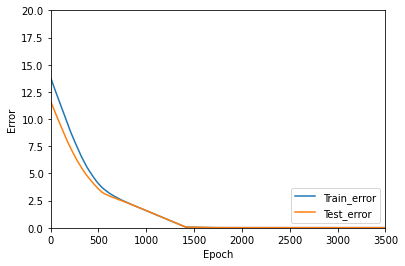

In [31]:
# Visualize performance evaluation
plt.plot(history.history['mean_absolute_error'], label='Train_error')
plt.plot(history.history['val_mean_absolute_error'], label = 'Test_error')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.xlim([0, 3500])
plt.ylim([0, 20])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print(test_acc)

##**Problem 3**
In this problem, we will explore to use extended linear regression: $y_n=w_0 +\sum_{k=1}^Kw_kx_{n,k}$ to solve a real-world problem on stock forecasting. Your task is predict the Close value based on the Open, High, and Low values given in Lab1_3.csv.  
Requirments: 
*   You are required to use gradient descent algorithm to complete this problem. 
*   You need to include the following four components in your lab report: (1) the codes, (2) the obtained appropriate value of $w_0$, $w_1$, ..., $w_K$ , (3) the obtained training error, and (4) the obtained testing error. 

In [36]:
# Some useful hint. Please feel free to program without the hint
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, optimizers
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split 
# Import Data
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Lab1_CNIT483/Lab1_3.csv')
x_data = data[['Open','High','Low']]
y_data = data['Close']
# Generate training data (70% of the given data samples) and the testing data (30% of the given data samples). You can change to other percentage value as long as test_size <=0.3.
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3) 

In [37]:
# initializing Gradient-descent model
# Ref: 1) tf.keras.layers.Normalization: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Normalization; and 2) tf.keras.layers.Dense: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense
model = models.Sequential()
model.add(layers.Normalization(input_shape=(3,), axis=None))
model.add(layers.Dense(1))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_5 (Normalizat  (None, 3)                3         
 ion)                                                            
                                                                 
 dense_5 (Dense)             (None, 1)                 4         
                                                                 
Total params: 7
Trainable params: 4
Non-trainable params: 3
_________________________________________________________________


In [38]:
# Build learning model by using gradient-descent method
adam = optimizers.Adam(learning_rate=0.5)
model.compile(optimizer='adam',
              loss='mean_absolute_error',
              metrics=['mean_absolute_error'])

history = model.fit(x_train, y_train, epochs=3500, 
                    validation_data=(x_test, y_test))

Streaming output truncated to the last 5000 lines.
6/6 [==============================] - 0s 16ms/step - loss: 6.9840 - mean_absolute_error: 6.9840 - val_loss: 9.1441 - val_mean_absolute_error: 9.1441
Epoch 1002/3500
6/6 [==============================] - 0s 17ms/step - loss: 6.9750 - mean_absolute_error: 6.9750 - val_loss: 9.1465 - val_mean_absolute_error: 9.1465
Epoch 1003/3500
6/6 [==============================] - 0s 13ms/step - loss: 6.9734 - mean_absolute_error: 6.9734 - val_loss: 9.1405 - val_mean_absolute_error: 9.1405
Epoch 1004/3500
6/6 [==============================] - 0s 16ms/step - loss: 6.9770 - mean_absolute_error: 6.9770 - val_loss: 9.1404 - val_mean_absolute_error: 9.1404
Epoch 1005/3500
6/6 [==============================] - 0s 14ms/step - loss: 6.9792 - mean_absolute_error: 6.9792 - val_loss: 9.1492 - val_mean_absolute_error: 9.1492
Epoch 1006/3500
6/6 [==============================] - 0s 16ms/step - loss: 6.9683 - mean_absolute_error: 6.9683 - val_loss: 9.1317 - v

In [40]:
# Output weights and biases
W = model.layers[1].get_weights()
print(W)

[array([[0.22192445],
       [0.01948001],
       [0.77633953]], dtype=float32), array([-0.10179457], dtype=float32)]


3/3 - 0s - loss: 6.9236 - mean_absolute_error: 6.9236 - 40ms/epoch - 13ms/step
6.923580646514893


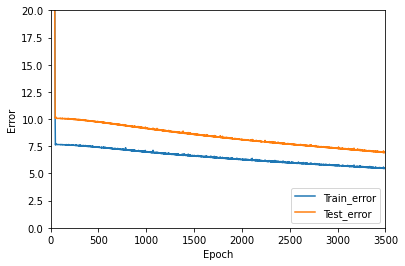

In [41]:
# Visualize performance evaluation
plt.plot(history.history['mean_absolute_error'], label='Train_error')
plt.plot(history.history['val_mean_absolute_error'], label = 'Test_error')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.xlim([0, 3500])
plt.ylim([0, 20])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print(test_acc)